In [30]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

In [31]:
NUMBER_OF_CLASSES=5
BATCH_SIZE=32 # using minibatch of 32 samples

In [32]:
template_features = np.genfromtxt('../data/interim/template_matching.csv', skip_header=True, dtype=float, delimiter=',')
gabriel_features = np.genfromtxt('../data/processed/combined_features.csv', skip_header=True, dtype=float, delimiter=',')
print('labels do match?', all(template_features[:, 0] == gabriel_features[:, 0]))
y = tf.one_hot(indices=template_features[:,0], depth=NUMBER_OF_CLASSES).numpy()
X = np.hstack((template_features[:,1:], gabriel_features[:,1:]))

X = X / X.max(axis=0) # alongside rows, per column

print(X.shape, y.shape)
number_of_features = X.shape[1]


labels do match? True
(10000, 205) (10000, 5)


In [33]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

Big question:
* Is it worthwhile to center data?
* Is it worthwhile to scale data or normalize to (0, 1) range?
For later!


EDIT:
First answer: FOR RELU YOU NEED TO SCALE FOR (0,1) AND FOR TANH FOR (-1,1) OTHERWISE IT WON'T WORK!

In [39]:
input_shape = (number_of_features,) # need to pass that comma, as otherwise it'd be evaluated as simple int i.e. type((5))==int, type((4,))==tuple
model = tf.keras.Sequential(
    [
    tf.keras.Input(shape=input_shape),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
       tf.keras.layers.Dense(units=NUMBER_OF_CLASSES, activation='softmax', kernel_initializer='glorot_normal')
    ]
)

model.summary()

ValueError: Could not interpret initializer identifier: hej_normal

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True), # stochastic gradient descent, but can specify batch size.
    loss='categorical_crossentropy',
    metrics=['AUC'],
)

In [36]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8669 - loss: 0.9707
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9719 - loss: 0.4608
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9759 - loss: 0.4280
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9774 - loss: 0.4113
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9793 - loss: 0.3973
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9800 - loss: 0.3817
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9806 - loss: 0.3755
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9836 - loss: 0.3477
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9826 - loss: 0.3585
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9842 - loss: 0.3365


In [37]:
results = model.evaluate(X_val, y_val, batch_size=32)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9713 - loss: 0.4748  


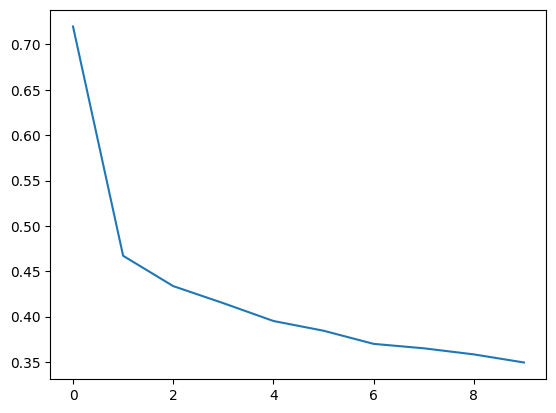

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [10]:
model.save('../models/v0.01_reference_nn.keras')